#1. 선형회귀분석

##1) 선형성, 데이터

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

data = pd.read_csv("adv.csv")

In [3]:
A=data.TV
B=data.sales

In [4]:
print(sp.stats.pearsonr(A,B))   #상관관계


PearsonRResult(statistic=np.float64(0.7822244248616066), pvalue=np.float64(1.467389700194602e-42))


 - 데이터파티셔닝/스케일링 등

In [5]:
#X변수: TV, radio, newspaper, Y변수: sales
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
variables = ["sales","TV","newspaper","radio"]
df = pd.DataFrame( StandardScaler().fit_transform(data[variables]),
                  columns=variables)
train, test = train_test_split( df, test_size=0.2)

- 다중공선성(Multi colinearity)
 - 다중공선성이 있으면 X변수들에 따라 계수가 변동

In [6]:
df.corr()#method='spearman')

,sales,TV,newspaper,radio
sales,1.000000,0.782224,0.228299,0.576223
TV,0.782224,1.000000,0.056648,0.054809
newspaper,0.228299,0.056648,1.000000,0.354104
radio,0.576223,0.054809,0.354104,1.000000


- 다중공선성 확인
  - 5를 초과하는 값이 있는지 확인

In [7]:
# Use variance inflation factor to identify any significant multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[["TV","newspaper","radio"]])

,variables,VIF
0,TV,1.004611
1,newspaper,1.145187
2,radio,1.144952


##2) statmodels 사용

In [8]:
import statsmodels.api as sm
reg = sm.OLS.from_formula("sales ~TV+radio+newspaper", df).fit()  #train
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.58e-96
Time:                        08:27:43   Log-Likelihood:                -56.280
No. Observations:                 200   AIC:                             120.6
Df Residuals:                     196   BIC:                             133.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.023  -6.67e-15      1.0

In [9]:
from statsmodels.formula.api import ols
model = ols(formula = "sales ~TV+radio+newspaper",data = train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     408.9
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.15e-73
Time:                        08:27:46   Log-Likelihood:                -51.308
No. Observations:                 160   AIC:                             110.6
Df Residuals:                     156   BIC:                             122.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0065      0.027      0.242      0.8

In [ ]:
model.predict( test )

In [11]:
pred = model.predict(test)
np.sqrt( np.mean( (pred-test.sales)**2 ) ) #RMSE

np.float64(0.2663389143451768)

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error( pred, test.sales)  #MSE

0.07093641729456744

##3) sklearn 이용

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
line_fitter = LinearRegression().fit(df[["TV","radio"]], df.sales)
line_fitter.coef_
line_fitter.intercept_
#line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

np.float64(2.4502288680601772e-17)

In [18]:
#df에 scaling을 적용, StandardScaler를 사용
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame( StandardScaler().fit_transform(df), columns=df.columns)
#scaler = StandardScaler()
#scaled = scaler.fit_transform( df )
#df = pd.DataFrame( scaled, columns=df.columns)
#df를 train, test로 파티셔닝
train, test = train_test_split( df, test_size=0.2)
model = LinearRegression().fit( train.drop(['sales'], axis=1),
                               train.sales)

In [26]:
model.feature_names_in_

array(['TV', 'newspaper', 'radio'], dtype=object)

In [30]:
#X변수: TV, radio, newspaper, Y변수: sales
#model.coef_, model.intercept_
pred = model.predict(  test[["TV", "newspaper", "radio"]] )

In [31]:
import numpy as np
np.mean(   (pred - test.sales)**2  )  #Mean Squared Error
np.sqrt( np.mean(   (pred - test.sales)**2  ) ) #Rooted Mean Squared Error

np.float64(0.3066522818791244)

In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
variables = ["sales","TV","newspaper","radio"]
df = pd.DataFrame( StandardScaler().fit_transform(data[variables]),columns=variables)
train, test = train_test_split( df, test_size=0.2)

<Axes: >

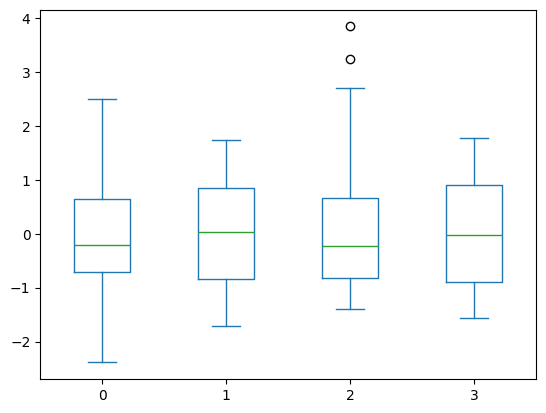

In [41]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
df3_imputed = imputer.transform(df)
df3_imputed_df = pd.DataFrame( df3_imputed )
df3_imputed_df.plot.box()

In [42]:
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3_imputed)
train, test = train_test_split( df3_scaled, test_size=0.3)
train_df = pd.DataFrame( train, columns = df.columns)
test_df = pd.DataFrame( test, columns = df.columns)

In [43]:
train_df

,sales,TV,newspaper,radio
0,1.283050,0.442057,-1.328202,1.393416
1,1.071690,0.230706,-1.240742,1.265121
2,-0.792119,-0.835393,-1.130265,-0.841614
3,1.763413,1.084286,-0.554867,1.231360
4,0.860330,0.052050,1.286405,1.217855
...,...,...,...,...
135,-0.830548,-0.989528,-0.564074,-0.720071
136,-0.388614,-0.826052,-0.669947,0.286030
137,-0.215683,-0.685929,1.972279,0.150983
138,-0.446257,0.270407,0.213864,-1.044184


In [44]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

LinearRegression()

In [45]:
y_predicted = line_fitter.predict(test_df.drop('sales', axis=1))

In [46]:
np.mean( (y_predicted-test_df.sales)**2 )

np.float64(0.13390417948605476)

#2. 실습1: 가스생산량

- Well
 - 시추공 식별자 (Well Index). 특정 지층 단면 또는 생산지역을 구분하는 고유 번호로, 각 샘플이 어느 시추공에서 측정되었는지를 나타냄.
- Por
 - 평균 공극률 (Porosity, %). 암석 내 유체가 채워질 수 있는 공간의 비율로, 저류능력과 밀접한 관련. 높은 공극률은 일반적으로 저장 용량이 큰 셰일을 의미.
- Perm
 - 투과율 (Permeability, mD). 유체가 암석을 통해 얼마나 잘 흐를 수 있는지를 나타내며, 높은 투과율은 생산성이 좋은 셰일층을 의미. 단위는 밀리다시(mD, millidarcy)
- AI
	- 음향 임피던스 (Acoustic Impedance, kg/m²s × 10⁶). 암석의 밀도와 탄성에 의해 결정되며, 지층의 물리적 특성과 반사율을 예측하는 데 사용. 지진파 해석에서 핵심 변수.
- Brittle
 - 취성 비율 (Brittleness Ratio, %). 암석이 얼마나 쉽게 깨질 수 있는지를 나타내며, Hydraulic Fracturing(수압파쇄) 가능성과 관련. 높은 값일수록 균열이 잘 발생하는 경향
- TOC
 - 총 유기탄소 함량 (Total Organic Carbon, %). 셰일층 내 포함된 유기물질의 비율로, 유기물로부터 가스 또는 오일 생성 가능성. 주요 원소로는 탄소(C)가 포함
- VR
 - 	비트리나이트 반사율 (Vitrinite Reflectance, %). 유기물의 열성숙도(thermal maturity)를 나타내는 지표로, 셰일 가스 또는 오일의 생성 가능성과 직결. 일반적으로 0.6~1.2%가 가스 생성에 적합한 성숙도.
- Prod
 - 하루당 가스 생산량 (Gas Production per Day, MCFD). 하루 동안 생산된 가스량(MCF/day 단위, thousand cubic feet per day)으로, 본 예제의 종속변수 (Response Variable). 암석 특성과 생산성과의 관계를 예측하는 데 사용

In [47]:
import pandas as pd
from sklearn import linear_model
import numpy as np

df = pd.read_csv('unconv_MV_v5.csv')

In [48]:
import numpy as np
features = ['Por']
target = 'Prod'
df[features].values.reshape(-1, len(features)).shape #200,1

(200, 1)

In [49]:
#X변수가 1개인 경우에만 아래처럼
X = df[features].values.reshape(-1, len(features))  #2차원으로 변경 필요
y = df[target].values

In [50]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [51]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [52]:
print( model.coef_ )
model.intercept_

[287.78074285]


np.float64(-2.944431053714652)

In [53]:
model.score(X, y) #R-squared

0.7428880535051593

- porosity 15%에서의 Production?

In [54]:
x_pred = np.array([15])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([4313.76671169])

In [55]:
x_pred = np.array([14, 18])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([4025.98596884, 5177.10894024])

In [56]:
# 위의 자료를 이용、 X변수는 por, brittle, toc, y변수는 prod
X=df[["Por", "Brittle", "TOC"]]
y=df.Prod
# x변수는 standard scaling
scaled = StandardScaler().fit_transform( X )
# 7:3으로 파티셔닝,
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)
# train으로 회귀모형
model = LinearRegression().fit( X_train, y_train )
print( model.score(X_train, y_train))
# test로 RMSE 계산
np.sqrt( np.mean( (model.predict( X_test) - y_test)**2 ) )

0.9496334802504064


np.float64(281.2883832403976)

- DV

In [57]:
x_pred = X[0:5]
y_pred = model.predict(x_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- 다중회귀

In [58]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [59]:
print(model.coef_)
model.intercept_

[244.60011793  31.58801063  86.87367291 325.19354135]


np.float64(-1575.2734966267144)

In [60]:
model.score(X, y)

0.9516996043535946

 - Por = 12 (%)
 - Brittle = 81 (%)
 - VR = 2.31 (%)
 - AI = 2.8 (kg/m2s*10^6)

In [61]:
x_pred = np.array([12, 81, 2.31, 2.8])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([5029.77688021])

- 다중공선성(Multi colinearity)
 - 다중공선성이 있으면 X변수들에 따라 계수가 변동

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('unconv_MV_v5.csv')
df = df.iloc[:, 1:-1] #x변수들만

corr = df.corr(method='spearman')

<Axes: >

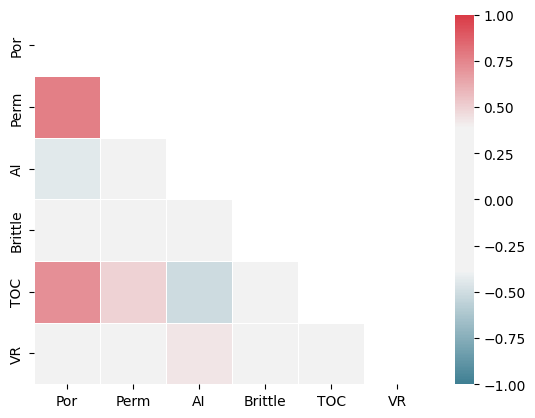

In [63]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)



- 선형회귀모형 시각화

In [64]:
df = pd.read_csv("unconv_MV_v5.csv")
df.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


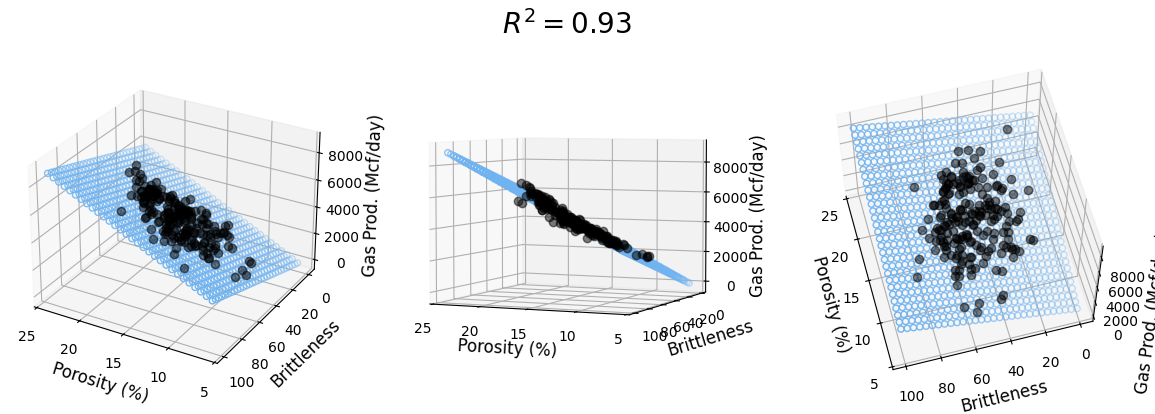

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#데이터 준비
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#학습
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#각도 조정
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
fig.tight_layout()

- 다른 시각화

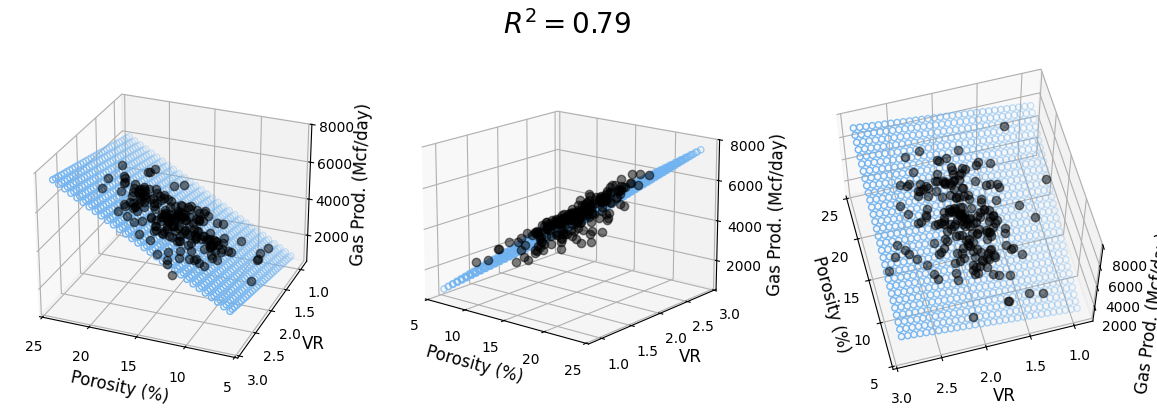

In [66]:
X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#학습
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

#시각화

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

#3. statmodels 사용

In [68]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values

In [69]:
import statsmodels.api as sm
model = sm.OLS(y, X)    #OLS: Ordinary Least Square
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.063e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                   6.70e-228
Time:                        08:37:12   Log-Likelihood:                         -1424.3
No. Observations:                 200   AIC:                                      2857.
Df Residuals:                     196   BIC:                                      2870.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
#df에서 X변수들간의 correlation을 체크
#por 변수와 함께, corr이 낮은 X 변수들을 선택
df.corr()
X = df[["Por", "AI", "Brittle"]]
y = df.Prod
#X 변수를 scaling
scaled = StandardScaler().fit_transform( X)

#파티셔닝(7:3)
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)

#sm.OLS로 회귀모형을 model, 계수에 대한 p-value와 결정계수를 확인
import statsmodels.api as sm
X_train = sm.add_constant( X_train)
model = sm.OLS( y_train, X_train)
print( model.fit().summary() )


                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     728.0
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.54e-83
Time:                        08:37:16   Log-Likelihood:                -967.66
No. Observations:                 140   AIC:                             1943.
Df Residuals:                     136   BIC:                             1955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4316.6395     20.894    206.595      0.0

In [71]:
X_test.shape

(60, 3)

In [72]:
X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          4.54e-127
Time:                        08:37:19   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1575.2735    119.064    -13.231      0.0

In [73]:
import statsmodels.api as sm
reg = sm.OLS.from_formula("Prod ~ Por+Brittle+Perm+TOC", df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          4.54e-127
Time:                        08:37:21   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.2735    119.064    -13.231      0.0

In [74]:
from statsmodels.formula.api import ols
model = ols(formula = "Prod ~ Por+Brittle+Perm+TOC",data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          4.54e-127
Time:                        08:37:24   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.2735    119.064    -13.231      0.0

In [75]:
X = df.loc[0:10, features]
model.predict(X)

,0
0,4581.655627
1,3507.380732
2,4668.052396
3,4941.935607
4,3943.748339
5,4395.427883
6,4309.754307
7,3418.971205
8,4109.893694
9,4469.807278


#3. 머신러닝 회귀

In [76]:
!pip install rfpimp

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=27757eff4c39b0b94162d6c6b379b73082b026f7855212d166ee8bae91e4d768
  Stored in directory: /root/.cache/pip/wheels/8a/47/c9/053e734c43f85fa336b795eca6fef84c824595d5d21cdb96d5
Successfully built rfpimp


In [77]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

np.mean( (y_test - dt.predict(X_test))**2)


np.float64(122962.16714169676)

66421.19237298753


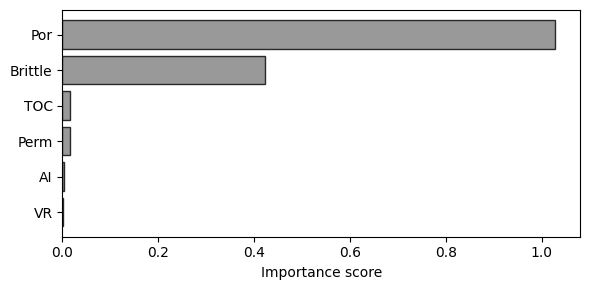

In [78]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

print( np.mean( (y_test - rf.predict(X_test))**2) )

#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()

#4. 실습2: CNC 데이터
- Passorfail: 1 또는 0


In [116]:
df = pd.read_csv("정밀가공_품질보증_데이터셋.csv")

In [117]:
df.head()

,SerialNo,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,20220823-0000185,2022-08-23 03:14:36.906,2227.05,1429.15,1364.51,30.3,4188.47,118.17,85.85,30.3,...,482.595381,19.046612,13.226897,0.0,478.681055,31398.31238,4271.395985,0.0,5320.503114,0
1,20220823-0000186,2022-08-23 03:14:37.884,2227.05,1510.96,3144.13,30.3,4188.47,154.53,173.72,30.3,...,568.919411,21.173073,18.608439,0.0,59.504038,32008.19381,3241.446411,0.0,5001.031891,0
2,20220823-0000187,2022-08-23 03:15:50.892,2227.05,1068.58,3144.13,30.3,4579.34,147.46,93.93,30.3,...,363.842687,18.603881,12.620133,0.0,46.232507,31502.08988,3515.539294,0.0,4963.334281,0
3,20220823-0000188,2022-08-23 03:17:13.888,2224.02,937.28,2377.54,30.3,4183.42,184.83,220.18,30.3,...,479.244638,22.790164,23.841988,0.0,479.783979,31207.89506,3391.720514,0.0,4736.149889,0
4,20220823-0000189,2022-08-23 03:18:26.904,2225.03,681.75,2377.54,30.3,4556.11,177.76,220.18,30.3,...,492.930251,21.737386,24.969696,0.0,337.164170,32091.01381,3114.918299,0.0,4825.433523,0


In [118]:
# 시간 컬럼을 datetime 형식으로 변환
df['ReceivedDateTime'] = pd.to_datetime(df['ReceivedDateTime'])
df.set_index('SerialNo', inplace=True)

In [119]:
# 1분 단위로 평균값 리샘플링
df_resampled = df.set_index('ReceivedDateTime').resample('10min')
df_resampled.mean().reset_index()

,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,ServoLoad_Z3_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,2022-08-23 03:10:00,2226.040000,1125.544000,2481.570000,30.3,4339.162000,156.550000,158.772000,30.3,2685.388000,...,477.506474,20.670223,18.653431,0.0,280.273150,31641.500988,3507.004100,0.0,4969.290539,0.000000
1,2022-08-23 03:20:00,2226.418750,1209.601250,2258.991250,30.3,4468.366250,158.948750,168.038750,30.3,2781.540000,...,557.646706,20.928086,21.901756,0.0,249.433842,31622.579219,3403.381734,0.0,5009.177779,0.000000
2,2022-08-23 03:30:00,2226.671250,1414.757500,2118.475000,30.3,3771.718750,146.576250,145.061250,30.3,928.063750,...,490.457734,19.592584,19.028410,0.0,116.200458,31879.413255,3395.349338,0.0,5020.183103,0.000000
3,2022-08-23 03:40:00,2224.881386,986.005286,2162.410000,30.3,4386.285714,140.534286,168.525714,30.3,2053.762857,...,476.244044,18.507282,22.625356,0.0,184.274116,31763.116389,3291.072711,0.0,4972.512444,0.142857
4,2022-08-23 03:50:00,2226.934972,1032.999944,1970.958889,30.3,3919.136667,158.682222,158.008889,30.3,2479.662222,...,471.660944,19.155532,19.371680,0.0,218.574741,31724.214817,3293.266851,0.0,4966.170943,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2022-08-25 09:30:00,2224.741429,1065.117143,2674.480000,30.3,4465.498571,157.415714,160.590000,30.3,2039.045714,...,549.960394,20.640053,20.279956,0.0,178.004514,31691.849834,3203.360518,0.0,4838.593939,0.000000
327,2022-08-25 09:40:00,2225.787500,1025.021225,2404.557500,30.3,4352.468750,141.905000,157.055000,30.3,1843.628750,...,472.786144,19.447256,18.650911,0.0,187.936787,31942.149519,3568.271541,0.0,5058.795607,0.125000
328,2022-08-25 09:50:00,2224.424000,985.535780,2430.969000,30.3,3274.218000,134.936000,132.815000,30.3,1933.241000,...,440.573689,18.667285,16.562112,0.0,204.208732,31802.397250,3584.552361,0.0,5024.159057,0.100000
329,2022-08-25 10:00:00,2226.376667,1245.835000,2639.803333,30.3,3854.833333,142.915000,134.666667,30.3,2929.673333,...,454.297454,19.314570,16.380185,0.0,284.993146,31856.746835,3623.745595,0.0,5034.237724,0.000000


In [120]:
df2 = df_resampled.mean().reset_index()

In [126]:
# passorfail은 다수결 기준 (1분간 pass의 비율)
passfail = df.set_index('ReceivedDateTime').resample('10min')['passorfail']. mean().reset_index()
passfail['passorfail']

,passorfail
0,0.000000
1,0.000000
2,0.000000
3,0.142857
4,0.111111
...,...
326,0.000000
327,0.125000
328,0.100000
329,0.000000


In [123]:
df2['passorfail'] = passfail['passorfail']

In [124]:
df2

,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,ServoLoad_Z3_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,2022-08-23 03:10:00,2226.040000,1125.544000,2481.570000,30.3,4339.162000,156.550000,158.772000,30.3,2685.388000,...,477.506474,20.670223,18.653431,0.0,280.273150,31641.500988,3507.004100,0.0,4969.290539,0.000000
1,2022-08-23 03:20:00,2226.418750,1209.601250,2258.991250,30.3,4468.366250,158.948750,168.038750,30.3,2781.540000,...,557.646706,20.928086,21.901756,0.0,249.433842,31622.579219,3403.381734,0.0,5009.177779,0.000000
2,2022-08-23 03:30:00,2226.671250,1414.757500,2118.475000,30.3,3771.718750,146.576250,145.061250,30.3,928.063750,...,490.457734,19.592584,19.028410,0.0,116.200458,31879.413255,3395.349338,0.0,5020.183103,0.000000
3,2022-08-23 03:40:00,2224.881386,986.005286,2162.410000,30.3,4386.285714,140.534286,168.525714,30.3,2053.762857,...,476.244044,18.507282,22.625356,0.0,184.274116,31763.116389,3291.072711,0.0,4972.512444,0.142857
4,2022-08-23 03:50:00,2226.934972,1032.999944,1970.958889,30.3,3919.136667,158.682222,158.008889,30.3,2479.662222,...,471.660944,19.155532,19.371680,0.0,218.574741,31724.214817,3293.266851,0.0,4966.170943,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2022-08-25 09:30:00,2224.741429,1065.117143,2674.480000,30.3,4465.498571,157.415714,160.590000,30.3,2039.045714,...,549.960394,20.640053,20.279956,0.0,178.004514,31691.849834,3203.360518,0.0,4838.593939,0.000000
327,2022-08-25 09:40:00,2225.787500,1025.021225,2404.557500,30.3,4352.468750,141.905000,157.055000,30.3,1843.628750,...,472.786144,19.447256,18.650911,0.0,187.936787,31942.149519,3568.271541,0.0,5058.795607,0.125000
328,2022-08-25 09:50:00,2224.424000,985.535780,2430.969000,30.3,3274.218000,134.936000,132.815000,30.3,1933.241000,...,440.573689,18.667285,16.562112,0.0,204.208732,31802.397250,3584.552361,0.0,5024.159057,0.100000
329,2022-08-25 10:00:00,2226.376667,1245.835000,2639.803333,30.3,3854.833333,142.915000,134.666667,30.3,2929.673333,...,454.297454,19.314570,16.380185,0.0,284.993146,31856.746835,3623.745595,0.0,5034.237724,0.000000


<Axes: >

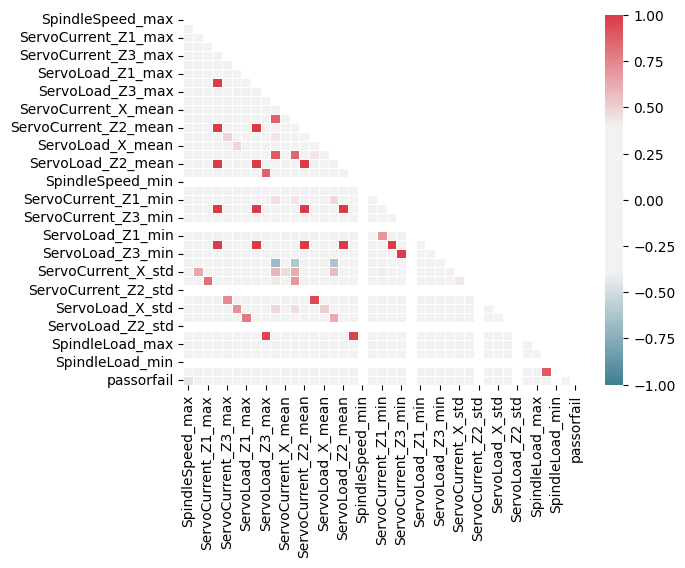

In [129]:
corr = df2.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

- Scaling, Partitioning, Regression

In [135]:
# 상관계수: 0.3 이상 또는 -0.3 이하
correlations = df.corr(numeric_only=True)['passorfail']

important_corr = correlations[(correlations >= 0.3) | (correlations <= -0.3)]

# 자기 자신 제거
important_corr = important_corr.drop('passorfail', errors='ignore')

important_corr

,passorfail
SpindleSpeed_max,-0.482542
ServoCurrent_X_mean,-0.347268
SpindleLoad_max,0.307452


- ML regression